# Quantum Teleportation (Basic Circuit with Protocol)

**The Goal**

Teleport an unknown quantum state
∣
𝜓
⟩
∣ψ⟩ from Alice (qubit 0) to Bob (qubit 2), using:

An entangled Bell pair (between qubits 1 and 2).

A Bell measurement on Alice’s side.

Two classical bits sent to Bob.

Correction gates by Bob.

At the end → Bob’s qubit (qubit 2) has the original state
∣
𝜓
⟩
∣ψ⟩.

In [ ]:
def simulate_teleportation(alpha, beta, show_plots = True):
    """Simulate quantum teleportation for an arbitrary qubit |ψ> = α|0> + β|1>."""
    # Build teleportation circuit
    # |ψ⟩ = α|0⟩ + β|1⟩ is the state to be teleported.
    qc = QuantumCircuit(3,2)

    # Prepare message state on qubit 0
    norm = np.sqrt(abs(alpha)**2+abs(beta)**2)
    alpha, beta = alpha/norm, beta/norm
    qc.initialize([alpha,beta],0)

    # Create entangled Bell pair (qubits 1 & 2)
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()

    # Bell measurement on Alice’s qubits (0 & 1)
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    qc.barrier()

    # Conditional operations (Bob corrects)
    qc.cx(1,2)
    qc.cz(0,2)

    qc.save_statevector()

    # Run on AerSimulator
    simulator = AerSimulator()
    qc_transpiled = transpile(qc,simulator)
    result = simulator.run(qc_transpiled,shots=10000).result()
    qc_statevector = result.get_statevector(qc_transpiled)

    #Extract Bob's qubit (trace out Alice's)
    bob_state = partial_trace(qc_statevector,[0,1])

    #Calculate fidelity
    psi_original = Statevector([alpha,beta])
    fidelity = state_fidelity(psi_original,bob_state)

    return {"circuit":qc, "bob state":bob_state,"fidelity":fidelity}



**Example 1**

Teleport (|0>+|1>)/√2

bob state : DensityMatrix([[0.5+0.000000e+00j, 0.5+6.123234e-17j],
               [0.5-6.123234e-17j, 0.5+0.000000e+00j]],
              dims=(2,))
fidelity: 1.0


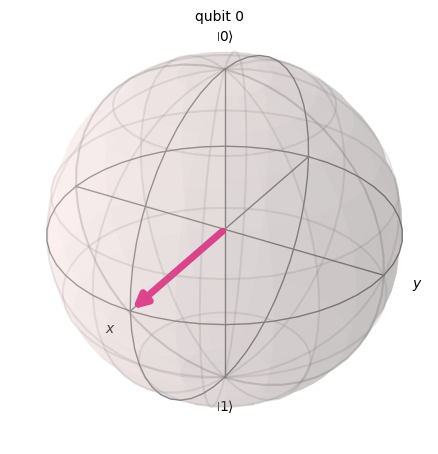

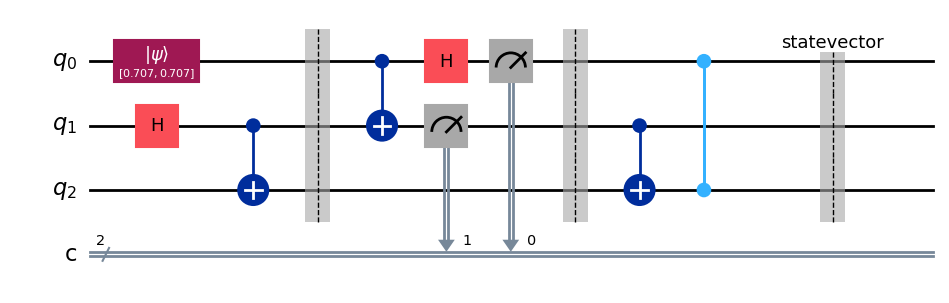

In [ ]:
# define the coefficients
alpha1, beta1 = 1/np.sqrt(2), 1/np.sqrt(2)

result1 = simulate_teleportation(alpha1,beta1)
qc1 = result1['circuit']
print(f"bob state : {result1['bob state']}")
print(f"fidelity: {result1['fidelity']}")
display(plot_bloch_multivector(result1['bob state']))
display(qc1.draw('mpl'))


**Example 1**

Teleport (|0>-|1>)/√2

bob state : DensityMatrix([[ 0.5+0.000000e+00j, -0.5-6.123234e-17j],
               [-0.5+6.123234e-17j,  0.5+0.000000e+00j]],
              dims=(2,))
fidelity: 1.0


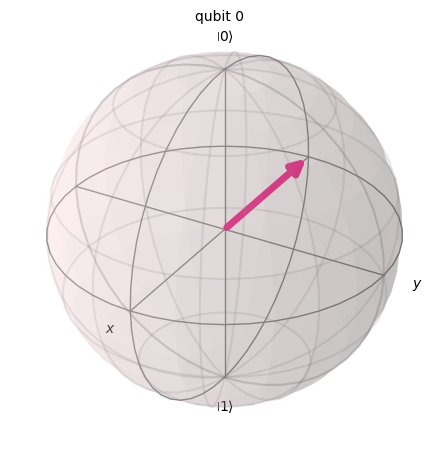

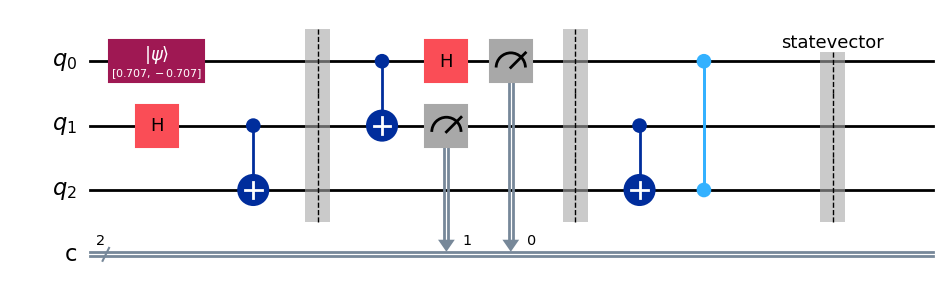

In [ ]:
# define the coefficients
alpha2, beta2 = 1/np.sqrt(2), -1/np.sqrt(2)

result2 = simulate_teleportation(alpha2,beta2)
qc2 = result2['circuit']
print(f"bob state : {result2['bob state']}")
print(f"fidelity: {result2['fidelity']}")
display(plot_bloch_multivector(result2['bob state']))
display(qc2.draw('mpl'))


**Example 1**

Teleport 0.6|0>+0.8|1>

bob state : DensityMatrix([[0.36+0.00000000e+00j, 0.48+5.87830464e-17j],
               [0.48-5.87830464e-17j, 0.64+0.00000000e+00j]],
              dims=(2,))
fidelilty: 1.0


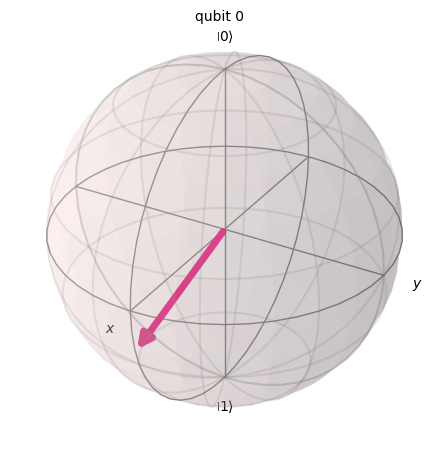

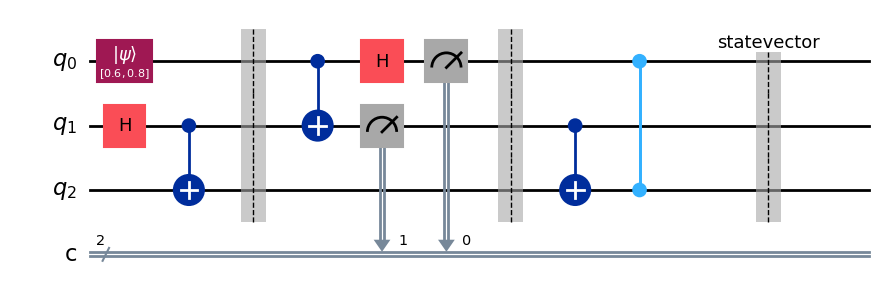

In [ ]:
# define the coefficients
alpha3,beta3 = 0.6,0.8

result3 = simulate_teleportation(alpha3,beta3)

qc3 = result3['circuit']
print(f"bob state : {result3['bob state']}")
print(f"fidelilty: {result3['fidelity']}")
display(plot_bloch_multivector(result3['bob state']))
display(qc3.draw('mpl'))